# Customer Segmentation

Customer Segmentation - Group Project
Customer Segmentation
Problem Statement:  XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers  instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

ML Problem: ABC analytics proposed customer segmentation approach to Bank.

ABC analytics assigned this talk to their analytics team and instructed their team to come up with the approach and feature which group similar behavior customer in one category and others in different category.

Note: Please read problem statement carefully and propose the approach which should be as per the customer requirement.

Task:

1. Business Understanding

2. Data Understanding

3. EDA

4. Feature Engineering

4. Model Building

5. Model Evaluation

6. Presentation (Recommendation slide is must)

7. Document the challenges

|**Column Name**|Description|
| --- | ---|
|**fecha_dato**|The table is partitioned for this column|
|**cust_code**|	Customer code|
|**emp_index**|Employee index: A active, B ex employed, F filial, N not employee, P pasive|
|**cust_residence**|Customer's Country residence|
|**'cust_gender**|Customer's sex|
|**age**|Age|
|**first_holder_date**|The date in which the customer became as the first holder of a contract in the bank|
|**new_cust_index**|New customer Index. 1 if the customer registered in the last 6 months|
|**cust_seniority**|Customer seniority (in months)|
|**indrel**|1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)|
|**last_date_primary_cust**|Last date as primary customer (if he isn't at the end of the month)|
|**cust_type**|Customer type at the beginning of the month: 1 (First/Primary customer), 2 (co-owner), P (Potential), 3 (former primary), 4(former co-owner)|
|**cust_rel_time**|Customer relation type at the beginning of the month: A (active), I (inactive), P (former customer), R (Potential)|
|**cust_res_index**|Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)|
|**'is_foreign**|Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)|
|**cust_spouse_index**|Spouse index. 1 if the customer is spouse of an employee|
|**channel_to_join**|channel used by the customer to join|
|**deceased_index**|Deceased index. N/S|
|**addres_type**|Addres type. 1, primary address|
|**cod_prov**|Province code (customer's address)|
|**name_province**|Province name|
|**activity_index**|Activity index (1, active customer; 0, inactive customer)|
|**household_income**|Gross income of the household|
|**saving_acc**|Saving Account|
|**guarantees**|Guarantees|
|**current_acc**|Current Accounts|
|**derivada_acc**|Derivada Account|
|**payroll_acc**|Payroll Account|
|**junior_acc**|Junior Account|
|**mass_particular_acc**|Más particular Account|
|**particular_acc**|particular Account|
|**particular_plus_acc**|particular Plus Account|
|**short_term_deposit**|Short-term deposits|
|**long_term_deposit**|Medium-term deposits|
|**ind_dela_fin_ult1**|Long-term deposits|
|**e_account**|e-account|
|**funds**|Funds|
|**mortgage**|Mortgage|
|**pensions1**|Pensions|
|**loans**|Loans|
|**taxes**|Taxes|
|**credit_card**|Credit Card|
|**securities**|Securities|
|**home_account**|Home Account|
|**payroll**|Payroll|
|**pensions2**|Pensions|
|**direct_debit**|Direct Debit|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio
template = 'simple_white'

import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

# Joseph

In [2]:
df = pd.read_csv("C:/Users/joean/Desktop/Data Science/Personal Projects/cust_seg.csv")
df

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   object 
 14  indresi            

In [4]:
df.columns

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom',
       'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [5]:
df.rename(columns = {
    'fecha_dato':'date', 
    'ncodpers':'cust_code', 
    'ind_empleado':'emp_index',
    'pais_residencia':'cust_residence', 
    'indext':'is_foreign', 
    'sexo':'cust_gender', 
    'fecha_alta':'first_holder_date',
    'ind_nuevo':'new_cust_index', 
    'antiguedad':'cust_seniority', 
    'ult_fec_cli_1t':'last_date_primary_cust', 
    'indrel_1mes':'cust_type', 
    'tiprel_1mes':'cust_rel_time', 
    'indresi':'cust_res_index',
    'conyuemp':'cust_spouse_index',
    'canal_entrada':'channel_to_join', 
    'nomprov':'name_province',
    'ind_actividad_cliente':'activity_index' ,
    'renta':'household_income',
    'tipodom':'addres_type',
    'indfall':'deceased_index',
    'ind_ahor_fin_ult1':'saving_acc', 
    'ind_aval_fin_ult1': 'guarantees', 
    'ind_cder_fin_ult1':'derivada_acc', 
    'ind_cno_fin_ult1':'payroll_acc',
    'ind_ctju_fin_ult1':'junior_acc',
    'ind_ctma_fin_ult1':'mass_particular_acc', 
    'ind_ctop_fin_ult1':'particular_acc',
    'ind_ctpp_fin_ult1':'particular_plus_acc', 
    'ind_deco_fin_ult1':'short_term_deposit', 
    'ind_deme_fin_ult1':'long_term_deposit', 
    'ind_ecue_fin_ult1':'e_account', 
    'ind_fond_fin_ult1':'funds', 
    'ind_hip_fin_ult1':'mortgage', 
    'ind_plan_fin_ult1':'pensions1', 
    'ind_pres_fin_ult1':'loans', 
    'ind_reca_fin_ult1':'taxes', 
    'ind_tjcr_fin_ult1':'credit_card', 
    'ind_valo_fin_ult1':'securities', 
    'ind_viv_fin_ult1':'home_account',
    'ind_cco_fin_ult1':'current_acc', 
    'ind_nomina_ult1':'payroll', 
    'ind_nom_pens_ult1':'pensions2', 
    'ind_recibo_ult1':'direct_debit'
}, inplace = True)

Dropping first two columns as they do not give much information.

In [6]:
df = df.iloc[:,2:]
df.head()

,cust_code,emp_index,cust_residence,cust_gender,age,first_holder_date,new_cust_index,cust_seniority,indrel,last_date_primary_cust,...,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit
0,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0


#### Checking for duplicate observations

`cust_code` contains customer codes. Lets check if there are duplicate customer codes

In [7]:
df['cust_code'].value_counts()

281941     2
362212     2
362218     2
362219     2
362220     2
          ..
1310578    1
1310579    1
1310645    1
1310643    1
1183305    1
Name: cust_code, Length: 626159, dtype: int64

There are duplicate customer codes. Since the bank wants to segment unique customers, I will drop observations with duplicate customer codes and keep only the last observation for each duplicated customer code observation.

In [8]:
df = df.drop_duplicates(subset = ['cust_code'], keep = "last").reset_index(drop = True)
print(df.shape)

(626159, 46)


In [9]:
1000000 - 626159

373841

Approximately 370K+ duplicated observation has been removed.

In [10]:
df['cust_code'].value_counts().sum()

626159

Now, all customer codes are unique. I will drop this variable has customer code does not give any information for customer segmentation.

In [11]:
df = df.drop('cust_code', axis = 1)
df.head()

,emp_index,cust_residence,cust_gender,age,first_holder_date,new_cust_index,cust_seniority,indrel,last_date_primary_cust,cust_type,...,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit
0,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [12]:
df.duplicated().sum()

15267

After dropping customer codes, we can see there are about 15k duplicate rows still. I have decided to drop these duplicates too.

In [13]:
df = df.drop_duplicates().reset_index(drop = True)

In [14]:
df

,emp_index,cust_residence,cust_gender,age,first_holder_date,new_cust_index,cust_seniority,indrel,last_date_primary_cust,cust_type,...,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit
0,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610887,N,ES,H,27,2013-09-25,0.0,22,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
610888,N,ES,H,56,2013-09-25,0.0,22,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
610889,N,ES,V,39,2013-09-25,0.0,22,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
610890,N,ES,V,36,2013-09-25,0.0,22,1.0,NaN,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


#### Checking for missing values

In [15]:
#checking percentage of missing values for every variable.
df.isna().sum()/len(df)*100

emp_index                  0.029301
cust_residence             0.029301
cust_gender                0.029629
age                        0.000000
first_holder_date          0.029301
new_cust_index             0.029301
cust_seniority             0.000000
indrel                     0.029301
last_date_primary_cust    99.873464
cust_type                  0.029301
cust_rel_time              0.029301
cust_res_index             0.029301
is_foreign                 0.029301
cust_spouse_index         99.985431
channel_to_join            0.037650
deceased_index             0.029301
addres_type                0.029301
cod_prov                   0.630390
name_province              0.630390
activity_index             0.029301
household_income          15.842899
saving_acc                 0.000000
guarantees                 0.000000
current_acc                0.000000
derivada_acc               0.000000
payroll_acc                0.000000
junior_acc                 0.000000
mass_particular_acc        0

Deleting variables having percentage of missing values higher than 20%

In [16]:
missing_info = (df.isna().sum()/len(df)*100)

to_drop = missing_info[missing_info.values > 20].index #setting threshold

print(f"columns to drop: {to_drop}")
print()

df = df.drop(to_drop, axis = 1).reset_index(drop = True)
print(df.shape)

columns to drop: Index(['last_date_primary_cust', 'cust_spouse_index'], dtype='object')

(610892, 43)


Checking unique values for each variable

In [17]:
for col in df.columns:
    print(col, ":", df[col].unique())
    print()

emp_index : ['N' nan 'A' 'B' 'F' 'S']

cust_residence : ['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL' 'RU' 'GT'
 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'CZ' 'ET' 'CM' 'SA' 'CI'
 'QA' 'SG' 'BO' 'BZ' 'UY' 'MD' 'BA' 'CF' 'KR' 'LU' 'NG' 'CD' 'ZA' 'AU'
 'KZ' 'CU' 'DK' 'JP' 'SK' 'GM' 'AO' 'HR' 'PK' 'PA' 'MK' 'LY' 'LT' 'TH'
 'GQ' 'GN' 'TR' 'IS' 'KE' 'VN' 'RS' 'AD' 'NZ' 'OM' 'EG' 'LV' 'ML' 'CG'
 'GW' 'HU' 'DZ' 'SL' 'GI' 'KH' 'MM' 'BY' 'PH' 'KW' 'GH' 'TN' 'TG' 'LB'
 'GE']

cust_gender : ['H' 'V' nan]

age : [' 35' ' 23' ' 22' ' 24' ' 65' ' 28' ' 25' ' 26' ' 53' ' 27' ' 32' ' 37'
 ' 31' ' 39' ' 63' ' 33' ' 55' ' 42' ' 58' ' 38' ' 50' ' 30' ' 45' ' 44'
 ' 36' ' 29' ' 60' ' 57' ' 67' ' 47' ' NA' ' 34' ' 48' ' 46' ' 54' ' 84'
 ' 15' ' 12' '  8' '  6' ' 83' ' 40' ' 77' ' 69' ' 52' ' 59' ' 43' ' 10'
 '  9' ' 49' ' 41' ' 51' ' 78' ' 16' 

Lets analyze each variable. First I will begin with `emp_index` and filter those observations with missing values.

#### `emp_index`: Employee index

In [18]:
df[df['emp_index'].isna()]

,emp_index,cust_residence,cust_gender,age,first_holder_date,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,...,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit
260,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1810,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,1
1827,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1879,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0
2093,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514105,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
527359,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
551707,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1.0,1.0,0
568366,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0.0,0.0,1


In [19]:
df[df['emp_index'].isna()].isna().sum()

emp_index              179
cust_residence         179
cust_gender            179
age                      0
first_holder_date      179
new_cust_index         179
cust_seniority           0
indrel                 179
cust_type              179
cust_rel_time          179
cust_res_index         179
is_foreign             179
channel_to_join        179
deceased_index         179
addres_type            179
cod_prov               179
name_province          179
activity_index         179
household_income       179
saving_acc               0
guarantees               0
current_acc              0
derivada_acc             0
payroll_acc              0
junior_acc               0
mass_particular_acc      0
particular_acc           0
particular_plus_acc      0
short_term_deposit       0
long_term_deposit        0
ind_dela_fin_ult1        0
e_account                0
funds                    0
mortgage                 0
pensions1                0
loans                    0
taxes                    0
c

There are about 6985 observation having missing values across multiple columns. It would be impossible to impute these observations with meaning full information as other columns belonging to same observation has missing values too. Therefore, I will drop these observations.

In [20]:
to_drop = df[df['emp_index'].isna()].index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)
print(df.shape)

(610713, 43)


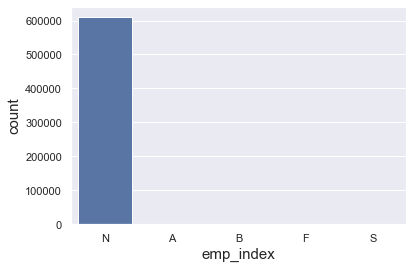

In [21]:
sns.countplot(df['emp_index']);

In [22]:
print(df['emp_index'].value_counts())
print()
print(df['emp_index'].value_counts(normalize = True)*100)

N    610233
B       194
A       144
F       141
S         1
Name: emp_index, dtype: int64

N    99.921403
B     0.031766
A     0.023579
F     0.023088
S     0.000164
Name: emp_index, dtype: float64


Employee index: 
* A: active, 
* B: ex employed, 
* F: filial, 
* N: not employee, 
* P: pasive

Almost all customers are active. Only a small negligible portion of customers belong to other categories. 

#### `cust_residence`: Customer's Country residence

In [23]:
any(df['cust_residence'].isna()) # No Missing values

False

In [24]:
print(df['cust_residence'].value_counts())
print()
df['cust_residence'].value_counts(normalize = True)*100

ES    607040
FR       286
AR       276
DE       256
GB       254
       ...  
CD         1
KZ         1
GM         1
IS         1
GE         1
Name: cust_residence, Length: 113, dtype: int64



ES    99.398572
FR     0.046831
AR     0.045193
DE     0.041918
GB     0.041591
        ...    
CD     0.000164
KZ     0.000164
GM     0.000164
IS     0.000164
GE     0.000164
Name: cust_residence, Length: 113, dtype: float64

99.4% of customers are from spain.

#### `'cust_gender`: Customer's Gender

In [25]:
df['cust_gender'].isna().sum() 

2

Imputing `'cust_gender` variable with the mode.

In [26]:
df['cust_gender'] = df['cust_gender'].fillna(df['cust_gender'].mode()[0])

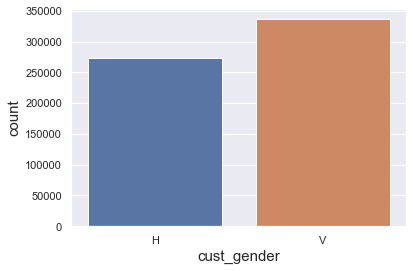

In [27]:
sns.countplot(df['cust_gender']);

'V' category is higher in proportion compared to 'H'

#### `age`: Age

In [28]:
df['age']

0          35
1          23
2          23
3          22
4          23
         ... 
610708     27
610709     56
610710     39
610711     36
610712     38
Name: age, Length: 610713, dtype: object

This variable is supposed to be numerical, but currently it is of object data type. In order to convert this variable to numerical, the 'NA' value must be dealt with first.

In [29]:
df.query('age == " NA"')

,emp_index,cust_residence,cust_gender,age,first_holder_date,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,...,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit


Luckily, when dealing with missing values in `emp_index`, the NA values in `age` has also been removed.

In [30]:
#Converting age to numerical
df['age'] = df['age'].str.strip().astype('int64')

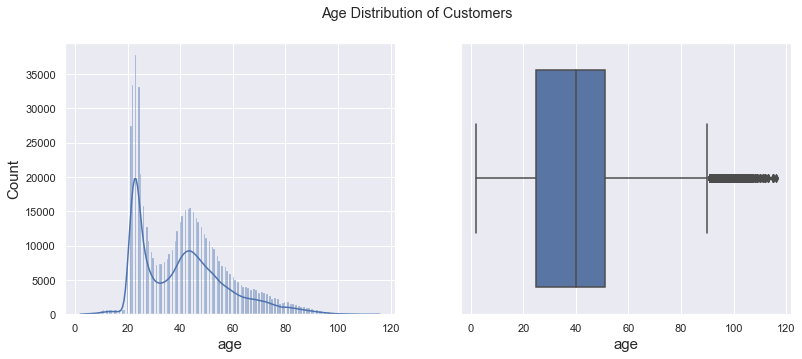

In [31]:
fig, ax = plt.subplots(1,2, figsize = (13,5));

sns.histplot(df['age'], kde = True, ax = ax[0]);
sns.boxplot(x = 'age', data = df, ax = ax[1]);

plt.suptitle("Age Distribution of Customers");

Age distribution is Bi-modal, where majority of customers are young, between the age of 20-30, followed by older customers, between the age of 40 and 50. There seems to outliers in both sides of the distribution.

In [32]:
df['age'].describe()

count    610713.000000
mean         40.734766
std          17.050297
min           2.000000
25%          25.000000
50%          40.000000
75%          51.000000
max         116.000000
Name: age, dtype: float64

There are customers as young as 2 years and customers as old as 116 years!

I will assign ages below 18 as 18. For ages older than 85, I will assign 85.

This method will take care of outliers on both sides of the distribution.

In [33]:
#Ages where below 18 will be assigned as 24, and ages above 85 will be assigned as 45.
df['age'] = np.where(df['age'] < 20, 18, (np.where(df['age'] > 85, 85, df['age'])))

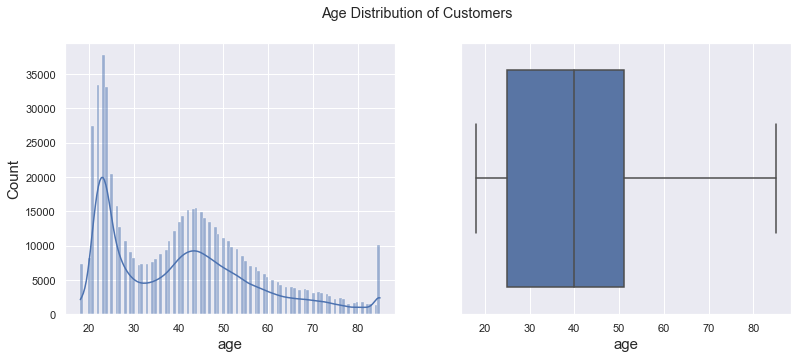

In [34]:
fig, ax = plt.subplots(1,2, figsize = (13,5));

sns.histplot(df['age'], kde = True, ax = ax[0]);
sns.boxplot(x = 'age', data = df, ax = ax[1]);

plt.suptitle("Age Distribution of Customers");

There are no more outliers in the age distribution.

#### `first_holder_date`: the date in which the customer became as the first holder of a contract in the bank

In [35]:
print(any(df['first_holder_date'].isna())) #No missing value
print()
df['first_holder_date']

False



0         2015-01-12
1         2012-08-10
2         2012-08-10
3         2012-08-10
4         2012-08-10
             ...    
610708    2013-09-25
610709    2013-09-25
610710    2013-09-25
610711    2013-09-25
610712    2013-09-25
Name: first_holder_date, Length: 610713, dtype: object

Converting to Datetime format

In [36]:
df['first_holder_date'] = pd.to_datetime(df['first_holder_date'])

In [37]:
df['first_holder_date_year'] = df.first_holder_date.dt.year #Extracting years
df['first_holder_date_month'] = df.first_holder_date.dt.month #extracting months
df['first_holder_date_day'] = df.first_holder_date.dt.weekday #extracting day of week

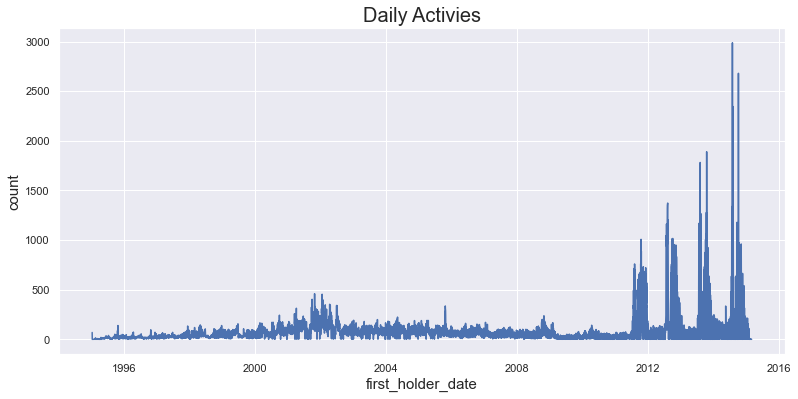

In [38]:
temp_df = df.groupby('first_holder_date').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'first_holder_date', y = 'count', data = temp_df);
ax.set_title("Daily Activies");

There is a significant spike in customers after 2010. There seems to be an upward trand and seasonality in number of customers.

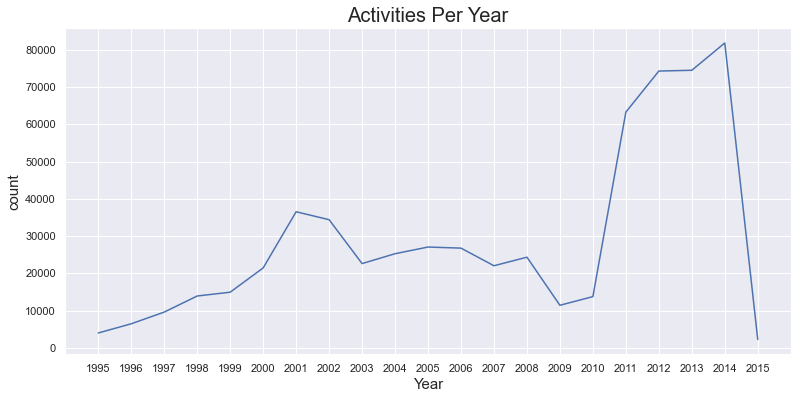

In [39]:
temp_df = df.groupby('first_holder_date_year').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'first_holder_date_year', y = 'count', data = temp_df);
ax.set_xticks(np.arange(1995, 2016, 1));
ax.set_title("Activities Per Year");
ax.set_xlabel("Year");

Years between 2011 and 2014 saw the highest number of applicants compared to other years

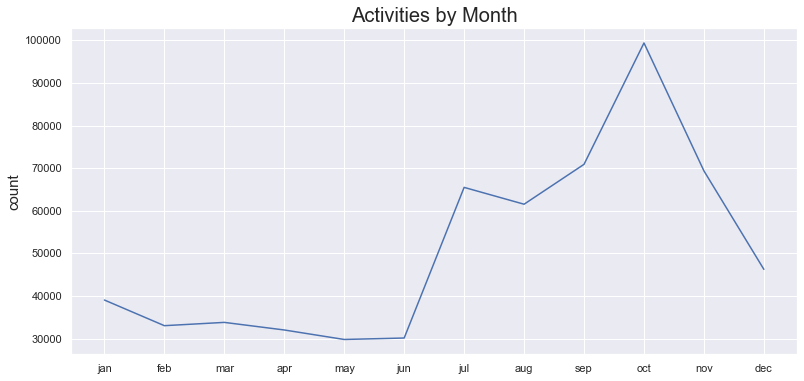

In [40]:
temp_df = df.groupby('first_holder_date_month').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'first_holder_date_month', y = 'count', data = temp_df);
plt.xticks(np.arange(1, 13, 1), ["jan", "feb", "mar", "apr", "may", "jun", "jul",
                                 "aug", "sep", "oct", "nov", "dec"]);
ax.set_title("Activities by Month");
ax.set_xlabel("");

For all years, most customers join during the month of october.

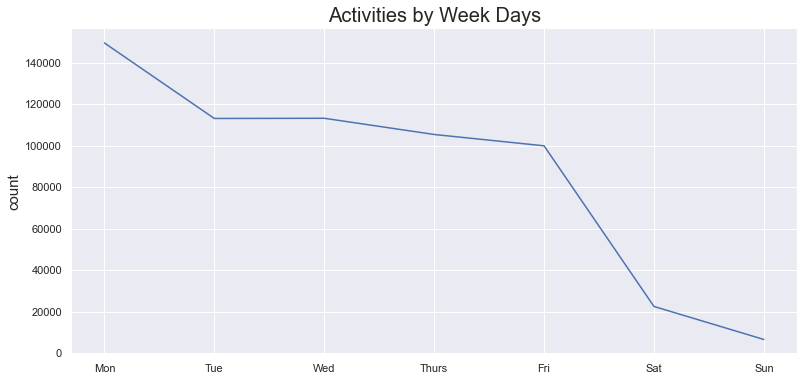

In [41]:
temp_df = df.groupby('first_holder_date_day').size().reset_index().rename(columns = {0:"count"})

plt.figure(figsize = (13,6));
ax = sns.lineplot(x = 'first_holder_date_day', y = 'count', data = temp_df);
plt.xticks(np.arange(0, 7, 1), ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);
ax.set_title("Activities by Week Days");
ax.set_xlabel("");

Monday sees the highest number of customers. Number of customers are lowest during the weekends.

28th to 32nd week in a year shows an increase in number of customers (july to august) followed by an increase again during week 40 (October).

In [42]:
#Dropping `fetcha_alta` as all the important information has already been extracted.

df = df.drop('first_holder_date', axis = 1)
df

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,...,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day
0,N,ES,H,35,0.0,6,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,0,2015,1,0
1,N,ES,V,23,0.0,35,1.0,1.0,I,S,...,0,0,0,0,0.0,0.0,0,2012,8,4
2,N,ES,V,23,0.0,35,1.0,1.0,I,S,...,0,0,0,0,0.0,0.0,0,2012,8,4
3,N,ES,H,22,0.0,35,1.0,1.0,I,S,...,0,0,0,0,0.0,0.0,0,2012,8,4
4,N,ES,V,23,0.0,35,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,0,2012,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610708,N,ES,H,27,0.0,22,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,1,2013,9,2
610709,N,ES,H,56,0.0,22,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,0,2013,9,2
610710,N,ES,V,39,0.0,22,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,1,2013,9,2
610711,N,ES,V,36,0.0,22,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,1,2013,9,2


#### `new_cust_index`: New customer Index. 1 if the customer registered in the last 6 months.

In [43]:
print(any(df['new_cust_index'].isna())) #No missing value
print()
df['new_cust_index']

False



0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
610708    0.0
610709    0.0
610710    0.0
610711    0.0
610712    0.0
Name: new_cust_index, Length: 610713, dtype: float64

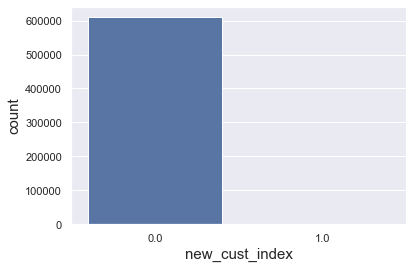

In [44]:
sns.countplot(df['new_cust_index']);

In [45]:
df['new_cust_index'].value_counts()

0.0    610315
1.0       398
Name: new_cust_index, dtype: int64

#### `cust_seniority`: Customer seniority (in months)

In [46]:
print(any(df['cust_seniority'].isna())) #No missing value
print()
df['cust_seniority']

False



0               6
1              35
2              35
3              35
4              35
           ...   
610708         22
610709         22
610710         22
610711         22
610712         22
Name: cust_seniority, Length: 610713, dtype: object

In [47]:
#converting to numerical

df['cust_seniority'] = df['cust_seniority'].astype('int64')

In [48]:
df['cust_seniority'].describe()

count    610713.000000
mean         81.022190
std        1810.983246
min     -999999.000000
25%          25.000000
50%          60.000000
75%         142.000000
max         246.000000
Name: cust_seniority, dtype: float64

In [49]:
df.query("cust_seniority == -999999")

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,...,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day
403021,N,ES,V,66,0.0,-999999,1.0,1.0,A,S,...,0,0,0,0,0.0,0.0,0,2005,6,2
414811,N,ES,V,51,0.0,-999999,1.0,1.0,A,S,...,1,1,1,0,1.0,1.0,1,1999,7,4


there are couple of observations with -999999 as value. This is clearly an error. Hence, these observations will be dropped.

In [50]:
to_drop = df.query("cust_seniority == -999999").index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)

In [51]:
df['cust_seniority'].describe()

count    610711.000000
mean         84.297324
std          65.264106
min           0.000000
25%          25.000000
50%          60.000000
75%         142.000000
max         246.000000
Name: cust_seniority, dtype: float64

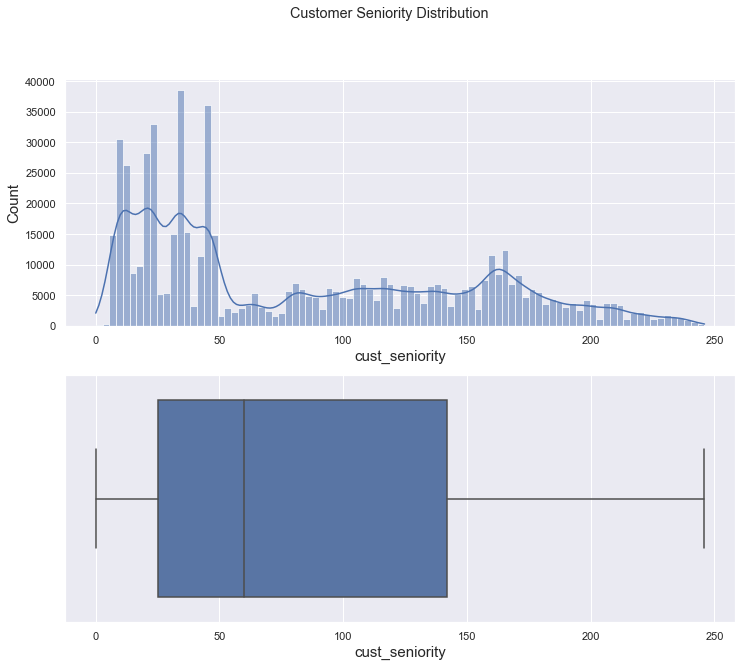

In [52]:
fig, ax = plt.subplots(2,1, figsize = (12,10));

sns.histplot(df['cust_seniority'], kde = True, ax = ax[0]);
sns.boxplot(x = 'cust_seniority', data = df, ax = ax[1]);

plt.suptitle("Customer Seniority Distribution");

There are no outliers for this variable.

#### `indrel`: 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

In [53]:
print(any(df['indrel'].isna())) #No missing value
print()
df['indrel'].value_counts()

False



1.0     609938
99.0       773
Name: indrel, dtype: int64

In [54]:
df['indrel'] = df['indrel'].replace(99.0, 0.0)
df['indrel'].value_counts()

1.0    609938
0.0       773
Name: indrel, dtype: int64

In [55]:
print(any(df['cust_type'].isna()))

df['cust_type'].value_counts()

False


1.0    610681
3.0        29
2.0         1
Name: cust_type, dtype: int64

#### `cust_rel_time`: Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)

In [56]:
print(any(df['cust_rel_time'].isna()))

df['cust_rel_time'].value_counts()

False


A    322571
I    288111
P        29
Name: cust_rel_time, dtype: int64

"P" refers to former customers. Since the bank is only interested in current customers, I will drop observations having `tripel_1mes` has "P".

In [57]:
to_drop = df.query("cust_rel_time == 'P'").index

df = df.drop(index = to_drop, axis = 0).reset_index(drop = True)
print(df.shape)

(610682, 45)


#### `cust_res_index`: Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)

In [58]:
print(any(df['cust_res_index'].isna()))

df['cust_res_index'].value_counts()

False


S    607009
N      3673
Name: cust_res_index, dtype: int64

In [59]:
df['cust_res_index'] = df['cust_res_index'].map({"S" : 1, "N" : 0})
df['cust_res_index'].value_counts()

1    607009
0      3673
Name: cust_res_index, dtype: int64

#### `is_foreign`: Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)

In [60]:
print(any(df['is_foreign'].isna()))

df['is_foreign'].value_counts()

False


N    583702
S     26980
Name: is_foreign, dtype: int64

In [61]:
df['is_foreign'] = df['is_foreign'].map({"S" : 1, "N" : 0})
df['is_foreign'].value_counts()

0    583702
1     26980
Name: is_foreign, dtype: int64

#### `channel_to_join`: channel used by the customer to join

In [62]:
pd.set_option('display.max_columns', None)
print(df['channel_to_join'].isna().sum())
df[df['channel_to_join'].isna()]

26


,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,is_foreign,channel_to_join,deceased_index,addres_type,cod_prov,name_province,activity_index,household_income,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,long_term_deposit,ind_dela_fin_ult1,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day
29839,N,ES,H,23,1.0,0,0.0,1.0,A,1,0,NaN,N,1.0,45.0,TOLEDO,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,7,0
55863,N,ES,V,47,1.0,1,1.0,1.0,A,1,0,NaN,N,1.0,25.0,LERIDA,1.0,49707.87,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,12,0
96043,N,ES,V,44,0.0,58,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,1.0,158917.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0,2010,8,0
97974,N,ES,V,42,1.0,0,1.0,1.0,I,1,0,NaN,N,1.0,28.0,MADRID,1.0,97555.77,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2010,12,3
152969,N,ES,H,21,1.0,0,1.0,1.0,A,1,0,NaN,N,1.0,8.0,BARCELONA,0.0,131768.82,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2014,7,3
197387,N,ES,V,32,1.0,0,1.0,1.0,I,1,0,NaN,N,1.0,28.0,MADRID,0.0,31722.21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2014,11,2
241447,N,ES,H,66,0.0,90,1.0,1.0,A,1,0,NaN,N,1.0,36.0,PONTEVEDRA,0.0,263960.61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2007,9,4
241669,N,ES,V,58,0.0,63,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,0.0,148147.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2006,1,5
256463,N,ES,V,62,0.0,88,1.0,1.0,A,1,0,NaN,N,1.0,28.0,MADRID,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,2005,4,4
289804,N,ES,H,57,0.0,59,1.0,1.0,A,1,1,NaN,N,1.0,28.0,MADRID,1.0,528905.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,0,2004,2,2


There are 26 observations with missing values.

In [63]:
df.query('cust_residence == "ES"')['channel_to_join'].value_counts(normalize = True)

KHE    0.336510
KAT    0.269935
KFC    0.241598
KFA    0.033400
KHD    0.009468
         ...   
KGU    0.000002
KGN    0.000002
KCT    0.000002
KDB    0.000002
KDI    0.000002
Name: channel_to_join, Length: 155, dtype: float64

In [64]:
df[df['channel_to_join'].isna()]['cust_rel_time'].value_counts()

A    20
I     6
Name: cust_rel_time, dtype: int64

In [65]:
df.query('cust_rel_time == "A"')['channel_to_join'].value_counts()

KAT    112231
KFC     99796
KHE     52118
KFA     14688
KHK      4674
        ...  
KFV         1
KEF         1
KCX         1
KHO         1
KGN         1
Name: channel_to_join, Length: 148, dtype: int64

All of the observations with missing values are from those customers from Spain. Therefore, I will impute this values with the mode of those customers from Spain.

In [66]:
val = df.query("cust_rel_time=='A' & cust_residence=='ES' & name_province=='MADRID'")['channel_to_join'].mode()[0]

df['channel_to_join'] = df['channel_to_join'].fillna(val)

#### `deceased_index`: Deceased index. N/S

In [67]:
print(any(df['deceased_index'].isna()))

df['deceased_index'].value_counts()

False


N    609096
S      1586
Name: deceased_index, dtype: int64

In [68]:
df['deceased_index'] = df['deceased_index'].map({"S" : 1, "N" : 0})
df['deceased_index'].value_counts()

0    609096
1      1586
Name: deceased_index, dtype: int64

#### `addres_type`: Address type. 1, primary address

In [69]:
print(any(df['addres_type'].isna()))

df['addres_type'].value_counts()

False


1.0    610682
Name: addres_type, dtype: int64

Since there is only one category for this variable, I will drop this.

In [70]:
df = df.drop('addres_type', axis = 1)
print(df.shape)

(610682, 44)


#### `cod_prov` & `name_province`: Province code (customer's address) / Province name

In [71]:
df['cod_prov'].value_counts()

28.0    201313
8.0      52846
41.0     28709
46.0     28704
15.0     19420
30.0     17229
29.0     17177
50.0     15630
11.0     13800
3.0      13371
36.0     12630
33.0     11947
47.0     10952
35.0     10506
6.0       8947
48.0      8450
45.0      8114
18.0      7823
37.0      7620
39.0      6846
14.0      6758
10.0      6243
21.0      6007
13.0      5490
2.0       5212
7.0       4979
12.0      4561
9.0       4356
32.0      3950
27.0      3935
31.0      3840
26.0      3803
43.0      3795
17.0      3748
24.0      3699
25.0      3355
20.0      3190
38.0      2993
23.0      2845
16.0      2754
4.0       2570
19.0      2568
49.0      2361
34.0      2263
40.0      1917
22.0      1790
5.0       1778
1.0       1665
44.0      1042
42.0       758
52.0       437
51.0       314
Name: cod_prov, dtype: int64

In [72]:
df['name_province'].value_counts()

MADRID                    201313
BARCELONA                  52846
SEVILLA                    28709
VALENCIA                   28704
CORUÑA, A                  19420
MURCIA                     17229
MALAGA                     17177
ZARAGOZA                   15630
CADIZ                      13800
ALICANTE                   13371
PONTEVEDRA                 12630
ASTURIAS                   11947
VALLADOLID                 10952
PALMAS, LAS                10506
BADAJOZ                     8947
BIZKAIA                     8450
TOLEDO                      8114
GRANADA                     7823
SALAMANCA                   7620
CANTABRIA                   6846
CORDOBA                     6758
CACERES                     6243
HUELVA                      6007
CIUDAD REAL                 5490
ALBACETE                    5212
BALEARS, ILLES              4979
CASTELLON                   4561
BURGOS                      4356
OURENSE                     3950
LUGO                        3935
NAVARRA   

Both of these variables are same since one `name_province` is the name of the province and `cod_prov` is the number assigned to the province. Hence I will remove `cod_prov`.

In [73]:
df = df.drop('cod_prov', axis = 1)
df.shape

(610682, 43)

In [74]:
print(df['name_province'].isna().sum())
df[df['name_province'].isna()]

3672


,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,is_foreign,channel_to_join,deceased_index,name_province,activity_index,household_income,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,long_term_deposit,ind_dela_fin_ult1,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day
1980,N,CA,V,53,0.0,35,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,1,2012,8,4
4041,N,CH,V,34,0.0,35,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,0
4239,N,CL,V,40,0.0,35,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,2
5755,N,IE,V,28,0.0,35,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0,2012,8,0
14671,N,AT,V,43,0.0,34,1.0,1.0,A,0,1,KFA,0,NaN,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,1,2012,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583617,N,DE,V,43,0.0,20,1.0,1.0,A,0,0,KFC,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0,0,2013,11,0
588297,N,ES,V,45,0.0,19,1.0,1.0,A,1,0,KFC,0,NaN,1.0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0,1.0,1,2013,12,4
591625,N,DE,V,38,0.0,19,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,12,4
603710,N,GB,V,36,0.0,19,1.0,1.0,A,0,0,KAT,0,NaN,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,7,3


There are about 3k missing values for this column. Most of the customers are not from Spain. Therefore, I will impute this column with the mode of the category of customers outside of Spain.

In [75]:
df[df['name_province'].isna()]['cust_residence'].value_counts()

FR    286
AR    276
DE    255
GB    254
CO    201
     ... 
KZ      1
CD      1
CF      1
BZ      1
GE      1
Name: cust_residence, Length: 113, dtype: int64

In [76]:
df.query('cust_residence != "ES"')['name_province'].value_counts()

MADRID         4
GUADALAJARA    1
PALMAS, LAS    1
Name: name_province, dtype: int64

In [77]:
#Imputing for thise customers from Spain.
(df[df['name_province'].isna()]['cust_residence'] == "ES").sum()

5

In [78]:
%%time

# Imputing for those customers outside of Spain
for i in df[df['name_province'].isna()].index:
    if df['cust_residence'][i] != "ES":
        df['name_province'][i] = "Foreign"
    else:
        df['name_province'][i] = "MADRID"

Wall time: 4.79 s


#### `activity_index`: Activity index (1, active customer; 0, inactive customer)

In [79]:
print(any(df['activity_index'].isna()))

df['activity_index'].value_counts()

False


1.0    331347
0.0    279335
Name: activity_index, dtype: int64

#### `household_income`: Gross income of the household

In [80]:
df['household_income'].isna().sum()

96601

Around 100k+ missing values. 

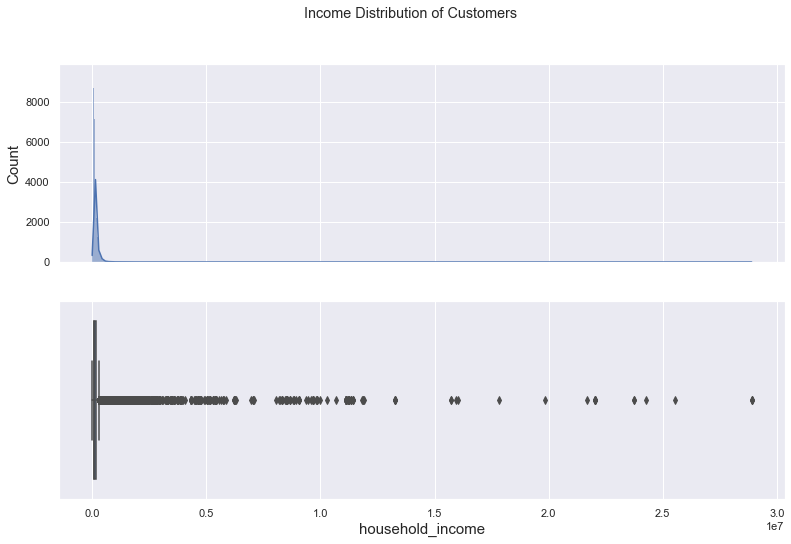

In [81]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['household_income'], kde = True, ax = ax[0]);
sns.boxplot(x = 'household_income', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers");

In [82]:
df['household_income'].describe()

count    5.140810e+05
mean     1.346062e+05
std      2.257407e+05
min      1.202730e+03
25%      6.919950e+04
50%      1.026189e+05
75%      1.570557e+05
max      2.889440e+07
Name: household_income, dtype: float64

We can see that the distribution is extremely skewed. Only fewer households earns income higher than 100k. Therefore imputing this variable with mean would not be the right approach. 

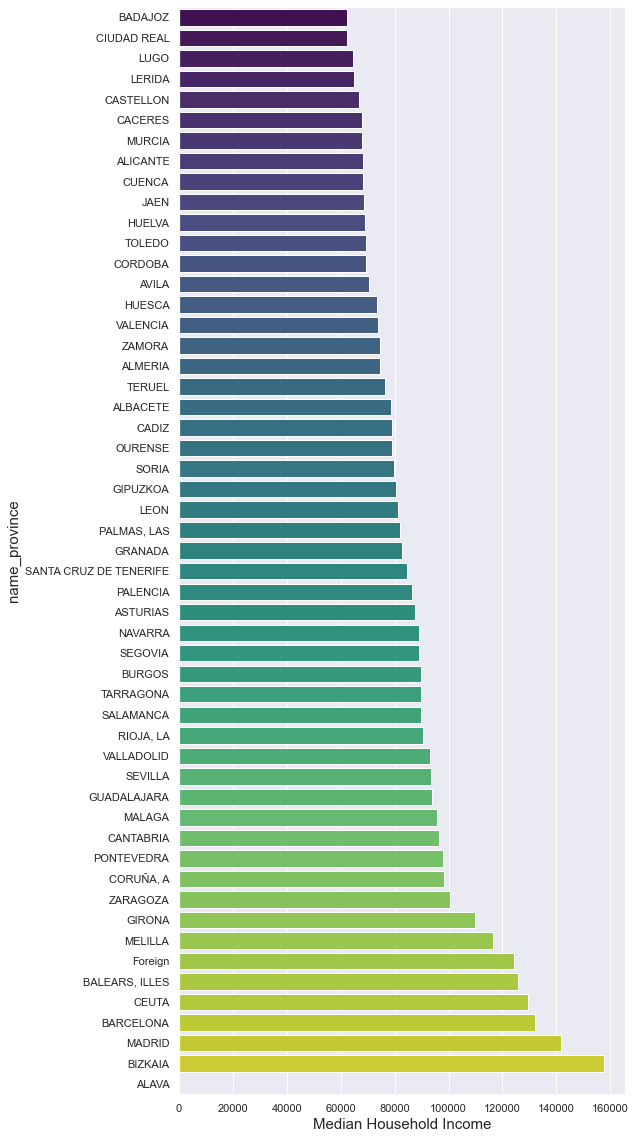

In [83]:
temp_df = df.groupby('name_province').agg({'household_income' : 'median'}).sort_values('household_income').reset_index()

plt.figure(figsize = (8, 20));
sns.barplot(x = 'household_income', y = 'name_province', data = temp_df, palette = "viridis");
plt.xlabel("Median Household Income");

We can see certain cities have higher median income compared to other cities. Therefore, I will impute this variable by filtering by province and then taking the median income of that province.

In [84]:
%%time
for city in df['name_province'].unique():
    if city == "ALAVA":
        df.loc[(df['name_province'] == f"{city}") & (df['household_income'].isna()), "household_income"] = \
        df['household_income'].median()
    else:
        df.loc[(df['name_province'] == f"{city}") & (df['household_income'].isna()), "household_income"] = \
        df.query(f'name_province == "{city}"')['household_income'].median()

Wall time: 3.85 s


In [85]:
df.isna().sum()

emp_index                   0
cust_residence              0
cust_gender                 0
age                         0
new_cust_index              0
cust_seniority              0
indrel                      0
cust_type                   0
cust_rel_time               0
cust_res_index              0
is_foreign                  0
channel_to_join             0
deceased_index              0
name_province               0
activity_index              0
household_income            0
saving_acc                  0
guarantees                  0
current_acc                 0
derivada_acc                0
payroll_acc                 0
junior_acc                  0
mass_particular_acc         0
particular_acc              0
particular_plus_acc         0
short_term_deposit          0
long_term_deposit           0
ind_dela_fin_ult1           0
e_account                   0
funds                       0
mortgage                    0
pensions1                   0
loans                       0
taxes     

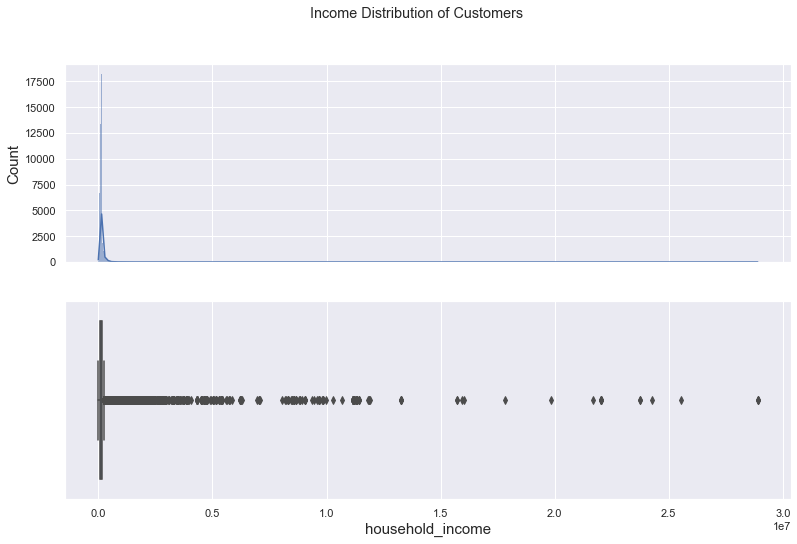

In [86]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['household_income'], kde = True, ax = ax[0]);
sns.boxplot(x = 'household_income', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers");

In [87]:
df['household_income'].describe()

count    6.106820e+05
mean     1.298273e+05
std      2.077581e+05
min      1.202730e+03
25%      7.124269e+04
50%      9.939778e+04
75%      1.477217e+05
max      2.889440e+07
Name: household_income, dtype: float64

There are extreme outliers for this variable. Therefore, I have created a class that applies different transformation techniques and visualizes its distribution. We can try to see which transformation helps transform the variable into a nearly normal distribution.

In [88]:
class num_transformer:
    def __init__(self, x, variable):
        self.x = x
        self.variable = variable

    def var_transform_plots(self):
    
        import scipy.stats as stats

        fig, ax = plt.subplots(1,3, figsize = (15,5))

        sns.histplot(self.x[self.variable], kde = True, ax = ax[0]);
        sns.boxplot(self.x[self.variable], ax = ax[1]);
        stats.probplot(self.x[self.variable], dist="norm", plot=plt);
        plt.suptitle('Current Distribution', fontsize = 20)

        import feature_engine.transformation as vt
        
        self.log = vt.LogTransformer()
        self.recipr = vt.ReciprocalTransformer()
        self.exp = vt.PowerTransformer()
        self.boxcox = vt.BoxCoxTransformer()
        self.yeojohn = vt.YeoJohnsonTransformer()
        
        transformation_dict = dict(
            log = self.log, 
            reciper = self.recipr, 
            exp = self.exp, 
            boxcox = self.boxcox, 
            yeojohn = self.yeojohn 
        )

        for name, trnfm in transformation_dict.items():
            try:
                self.x[name + '_' + self.variable] = trnfm.fit_transform(self.x[self.variable].to_frame())

            except ValueError:
                print(f"""
                      Some variables contain zero or negative values, can't apply {type(trnfm).__name__}
                """)
                continue

            else:
                fig, ax = plt.subplots(1,3, figsize = (15,5))
                sns.histplot(self.x[name + '_' + self.variable], 
                             kde = True, ax = ax[0]).set(xlabel=self.variable);
                
                sns.boxplot(self.x[name + '_' + self.variable], 
                            ax = ax[1]).set(xlabel=self.variable);
                
                stats.probplot(self.x[name + '_' + self.variable], 
                               dist="norm", 
                               plot=plt);
                
                plt.suptitle(type(trnfm).__name__, fontsize = 20)
                plt.show()
         
        print("#" * len('Normality Tests:'))
        print('Normality Tests:')        
        print("#" * len('Normality Tests:'))
        print()
        print("Null hypothesis: Variable comes from a normal distribution")
        print()
        
        cols = self.x.iloc[:, -5:].columns
        alpha = 1e-3
        
        for col in cols:
            k2, p = stats.normaltest(self.x[col].values)
            print(f'{col} P-Val: {p:.4f}')
            if p < alpha: 
                print(f"Reject H0, {col} is not normally distributed")
            else:
                print(f"Cannot Reject H0, {col} is normally distributed")
            print()

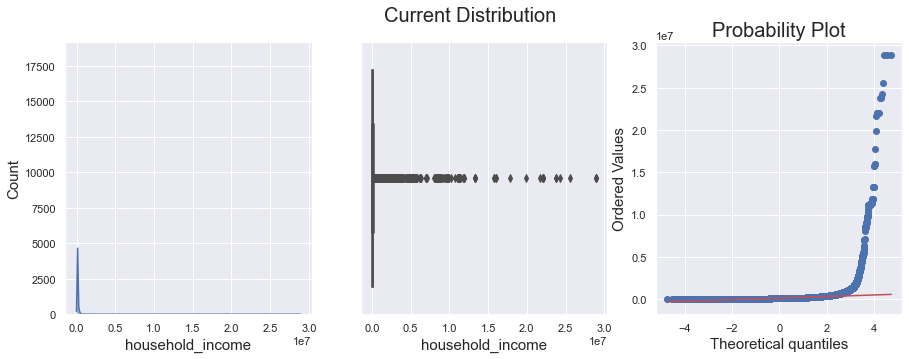

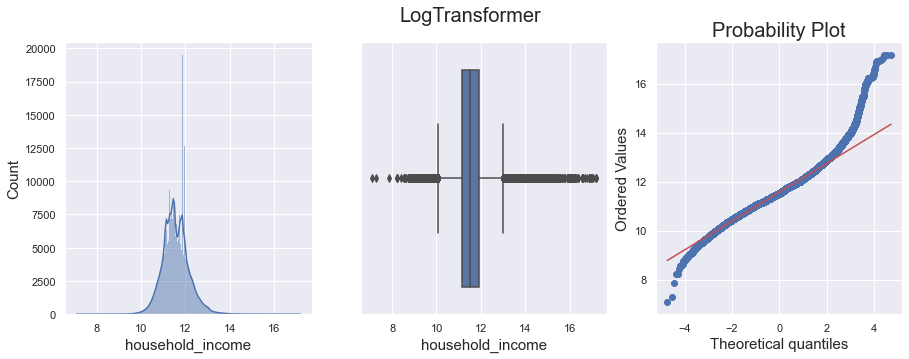

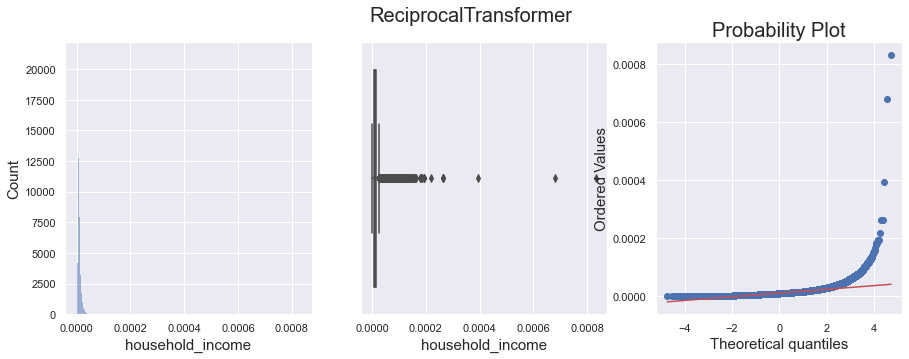

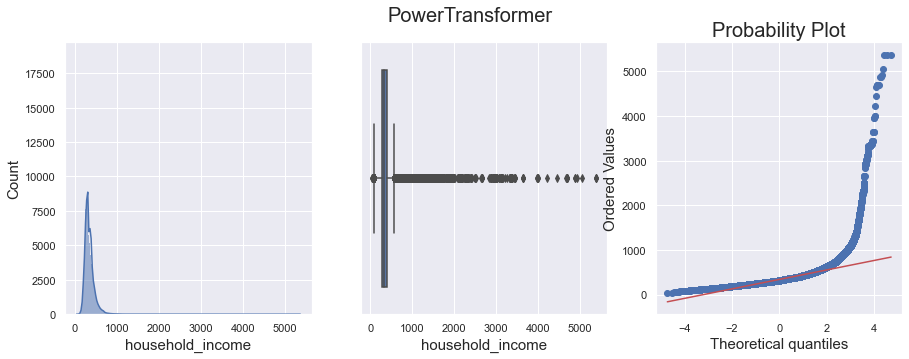

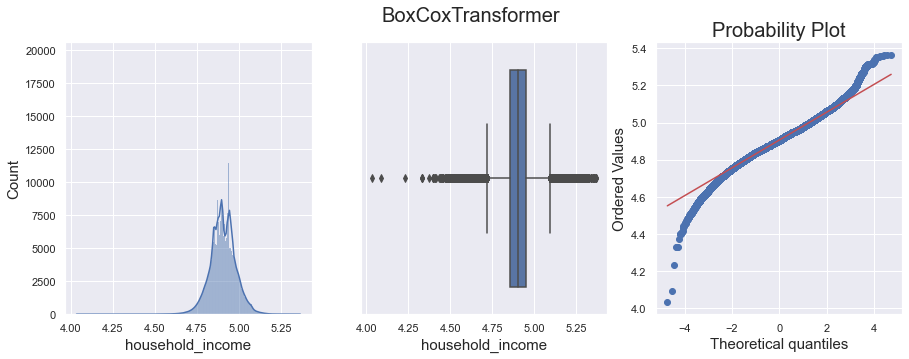

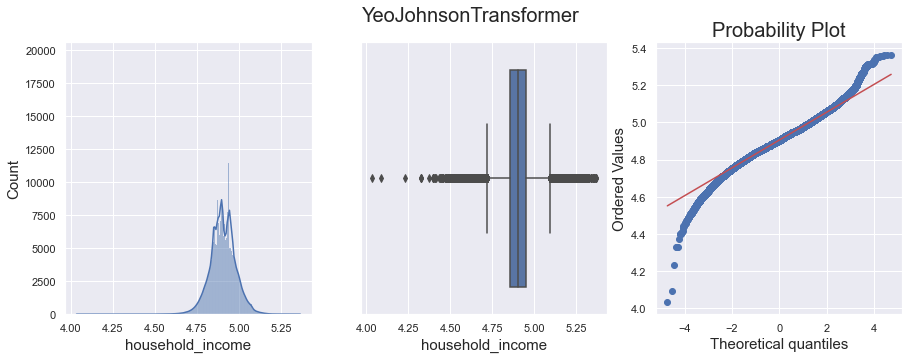

################
Normality Tests:
################

Null hypothesis: Variable comes from a normal distribution

log_household_income P-Val: 0.0000
Reject H0, log_household_income is not normally distributed

reciper_household_income P-Val: 0.0000
Reject H0, reciper_household_income is not normally distributed

exp_household_income P-Val: 0.0000
Reject H0, exp_household_income is not normally distributed

boxcox_household_income P-Val: 0.0000
Reject H0, boxcox_household_income is not normally distributed

yeojohn_household_income P-Val: 0.0000
Reject H0, yeojohn_household_income is not normally distributed



In [89]:
num_transformer(df, "household_income").var_transform_plots()

BoxCox and YeoJohnson transformer seems to do the job. Although its not normal distribution, it is somewhat close enough.

In [90]:
df = df.drop(['household_income', 'log_household_income', 'reciper_household_income', 'exp_household_income', 'yeojohn_household_income'], axis = 1)

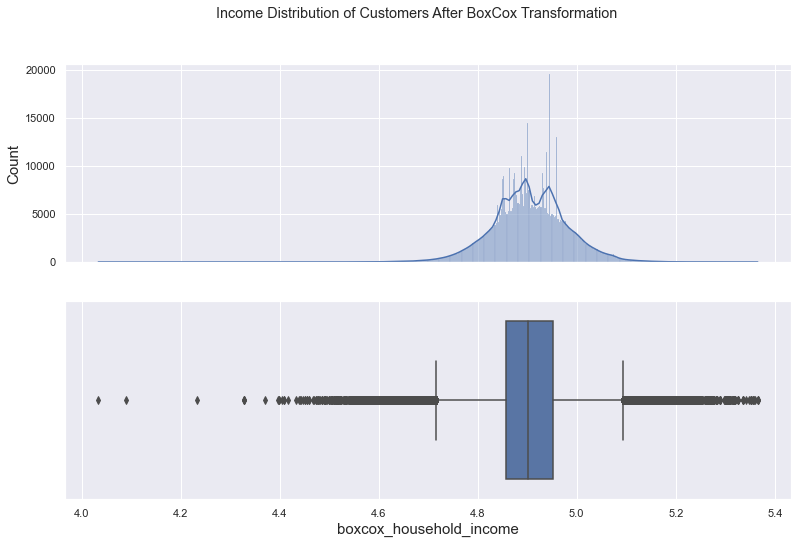

In [91]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['boxcox_household_income'], kde = True, ax = ax[0]);
sns.boxplot(x = 'boxcox_household_income', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers After BoxCox Transformation");

In [92]:
df.shape

(610682, 43)

Next, I will winsorize the remaining outliers. Winsoring helps distribute the outliers to the end of normal distribution.

In [93]:
from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['boxcox_household_income'])

df = windsoriser.fit_transform(df)

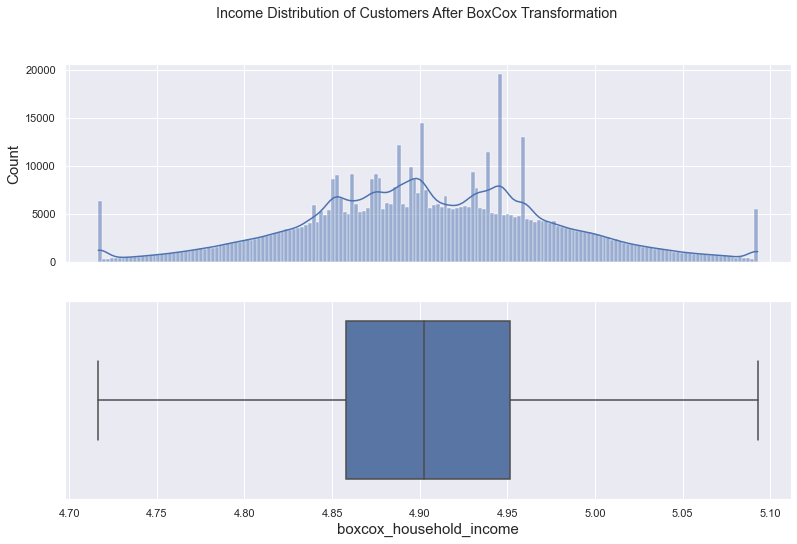

In [94]:
fig, ax = plt.subplots(2,1, figsize = (13,8), sharex = True);

sns.histplot(df['boxcox_household_income'], kde = True, ax = ax[0]);
sns.boxplot(x = 'boxcox_household_income', data = df, ax = ax[1]);

plt.suptitle("Income Distribution of Customers After BoxCox Transformation");

We can see a spike in values at either ends of the distribution. Winsorizing helped re-distribute the outliers to the ends of the normal distribution.

In [95]:
df.shape

(610682, 43)

### Bank Products

In [96]:
prod_cols = ['saving_acc', 'guarantees', 'current_acc', 'derivada_acc', 
             'payroll_acc', 'junior_acc', 'mass_particular_acc', 'particular_acc',
             'particular_plus_acc', 'short_term_deposit', 'long_term_deposit', 'ind_dela_fin_ult1', 
             'e_account', 'funds', 'mortgage', 'pensions1', 
             'loans', 'taxes', 'credit_card', 'securities',
             'home_account', 'payroll', 'pensions2', 'direct_debit']

labels = [
    "Saving Account", "Guarantees", "Current Accounts", "Derivada Account", "Payroll Account",
    "Junior Account", "Más particular Account", "particular Account", "particular Plus Account",
    "Short-term deposits", "Medium-term deposits", "Long-term deposits", "e-account", 
    "Funds", "Mortgage", "Pensions", "Loans", "Taxes", "Credit Card", "Securities", 
    "Home Account", "Payroll", "Pensions", "Direct Debit"
]

In [97]:
for col, name  in zip(prod_cols, labels):
    print(col, ":", name)
    print("-" * 50)
    print(f'Missing Values: {df[col].isna().sum()}')
    print("Value Counts")
    print(df[col].value_counts())
    print()

saving_acc : Saving Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    610593
1        89
Name: saving_acc, dtype: int64

guarantees : Guarantees
--------------------------------------------------
Missing Values: 0
Value Counts
0    610662
1        20
Name: guarantees, dtype: int64

current_acc : Current Accounts
--------------------------------------------------
Missing Values: 0
Value Counts
1    476525
0    134157
Name: current_acc, dtype: int64

derivada_acc : Derivada Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    610382
1       300
Name: derivada_acc, dtype: int64

payroll_acc : Payroll Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    551485
1     59197
Name: payroll_acc, dtype: int64

junior_acc : Junior Account
--------------------------------------------------
Missing Values: 0
Value Counts
0    603155
1      7527
Name: junior_acc, dtype: in

Only 2 columns featuring certain bank products have missing values. I will impute these with the mode again.

In [98]:
df['pensions1']

0         0
1         0
2         0
3         0
4         0
         ..
610677    0
610678    0
610679    0
610680    0
610681    0
Name: pensions1, Length: 610682, dtype: int64

In [99]:
df['pensions2']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
610677    0.0
610678    0.0
610679    0.0
610680    0.0
610681    0.0
Name: pensions2, Length: 610682, dtype: float64

In [100]:
compare_idx = df[df['pensions2'].notna()].index
print(len(compare_idx))

610620


In [101]:
(df.loc[compare_idx, 'pensions1'] == df.loc[df['pensions2'].notna(), 'pensions2']).sum()

563672

Both of these accounts are different.

In [102]:
df['payroll'] = df['payroll'].fillna(df['payroll'].mode()[0])
df['pensions2'] = df['pensions2'].fillna(df['pensions2'].mode()[0])

In [103]:
df.isna().sum()

emp_index                  0
cust_residence             0
cust_gender                0
age                        0
new_cust_index             0
cust_seniority             0
indrel                     0
cust_type                  0
cust_rel_time              0
cust_res_index             0
is_foreign                 0
channel_to_join            0
deceased_index             0
name_province              0
activity_index             0
saving_acc                 0
guarantees                 0
current_acc                0
derivada_acc               0
payroll_acc                0
junior_acc                 0
mass_particular_acc        0
particular_acc             0
particular_plus_acc        0
short_term_deposit         0
long_term_deposit          0
ind_dela_fin_ult1          0
e_account                  0
funds                      0
mortgage                   0
pensions1                  0
loans                      0
taxes                      0
credit_card                0
securities    

### All missing values has been taken care of!

In [104]:
product_df = df.groupby('age').agg({col : 'sum' for col in prod_cols})
product_df

,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,long_term_deposit,ind_dela_fin_ult1,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit
age,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,13,0,0,7235,0,1,0,0,0,34,0,0,2,0,0,10,0,0,0,2.0,18.0,0
20,0,0,7566,0,97,286,21,0,0,8,0,9,252,2,0,0,0,2,6,4,0,23.0,26.0,154
21,0,0,26714,0,286,0,9,0,0,6,2,37,488,11,0,0,0,19,22,8,0,109.0,131.0,693
22,0,0,32642,0,446,1,2,0,0,5,1,48,580,15,0,1,1,48,28,13,0,173.0,202.0,1194
23,0,0,36647,0,652,2,16,302,1,0,1,49,347,17,0,2,0,74,66,23,0,267.0,299.0,1437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,0,1177,1,79,0,27,791,106,2,14,273,194,83,0,4,1,67,44,88,3,3.0,73.0,124
82,0,0,1059,1,68,0,20,703,84,6,7,194,178,67,0,2,0,59,45,75,3,2.0,64.0,103
83,0,0,994,0,60,0,17,649,84,3,7,207,151,56,0,3,1,40,28,67,1,3.0,56.0,90


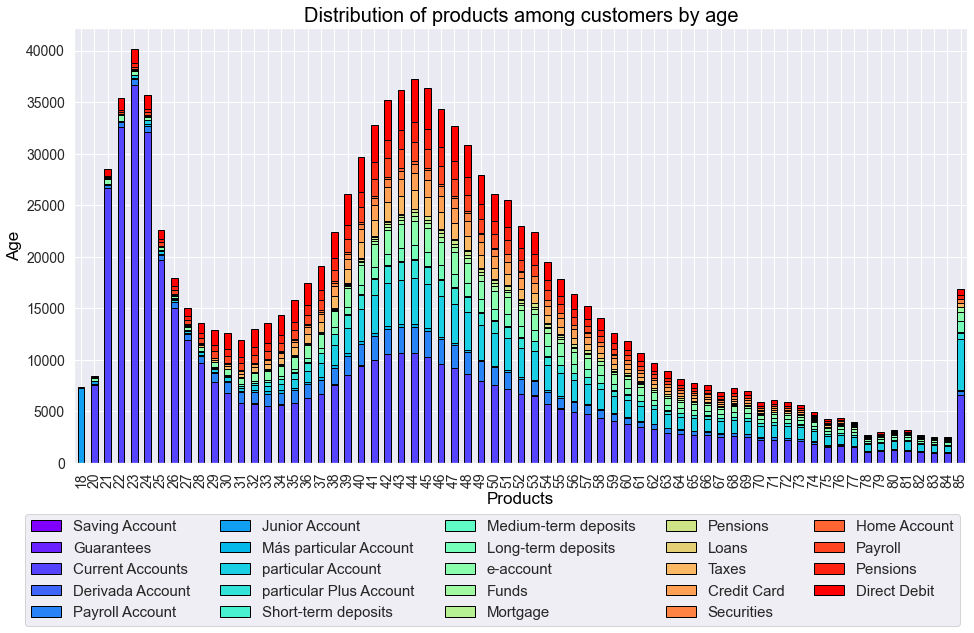

In [105]:
product_df.plot(kind='bar', stacked=True, fontsize=14, figsize=[16,8], colormap='rainbow', 
               edgecolor = "black")
plt.title('Distribution of products among customers by age', fontsize=20, color='black') 
plt.xlabel('Products', fontsize=17, color='black') 
plt.ylabel('Age', fontsize=17, color='black') 
# plt.ticklabel_format(style = 'plain')
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(1.0, -0.1), ncol = 5);

Above graph referred from [here](https://medium.com/@ravitee/santander-product-recommendation-ee4122d15072)

In [106]:
#Proportion of products by age of customers
prod_prop = product_df.div(product_df.sum(axis = 1), axis = 0)

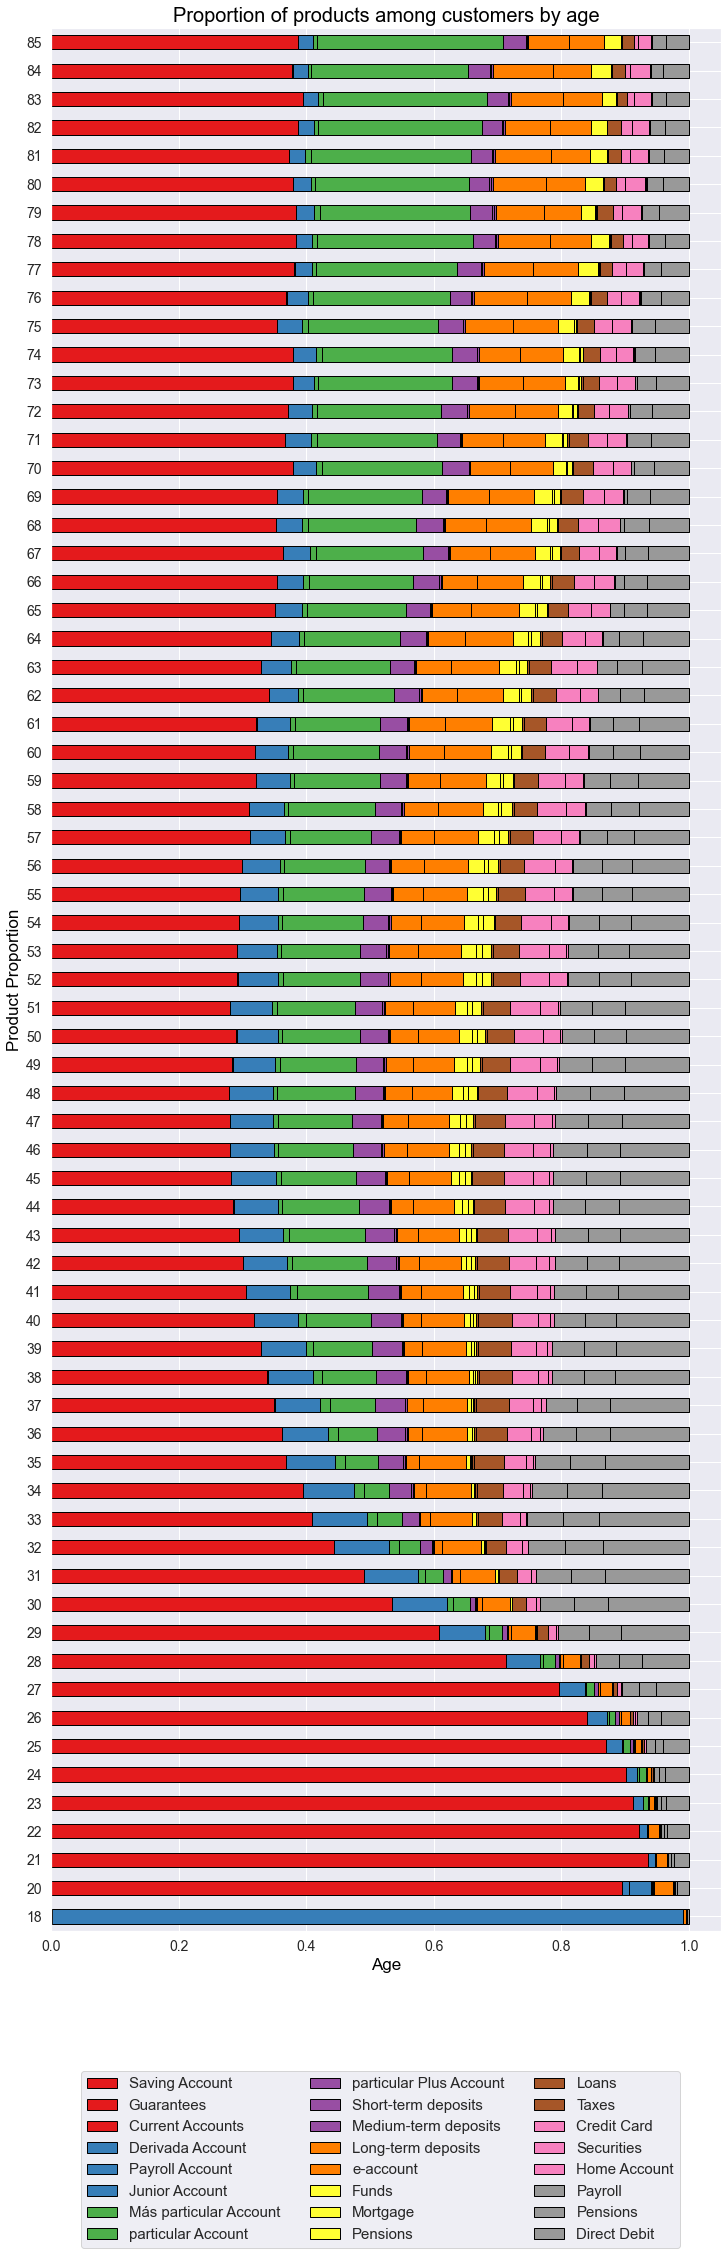

In [107]:
prod_prop.plot(kind = 'barh', stacked = True, fontsize=14, figsize=[12,35], colormap='Set1', 
               edgecolor = "black");

plt.title('Proportion of products among customers by age', fontsize=20, color='black') ;
plt.xlabel('Age', fontsize=17, color='black') ;
plt.ylabel('Product Proportion', fontsize=17, color='black') ;
plt.legend(labels = labels, prop={'size':15}, loc=1, bbox_to_anchor=(0.95, -0.07), ncol = 3);

Customer with age above 25 opt for more products from the bank.

The above clearly shows some customers hold multiple accounts. A new variable will be created that sums all the products together to see the total number of accounts a customer holds.

In [108]:
df['total_accounts'] = df.iloc[:, 15:-4].sum(axis = 1)

In [109]:
df['total_accounts'].value_counts()

1.0     375107
2.0     107651
3.0      43080
4.0      24375
0.0      16454
5.0      16184
6.0      12067
7.0       8215
8.0       4429
9.0       2053
10.0       732
11.0       249
12.0        69
13.0        13
14.0         3
15.0         1
Name: total_accounts, dtype: int64

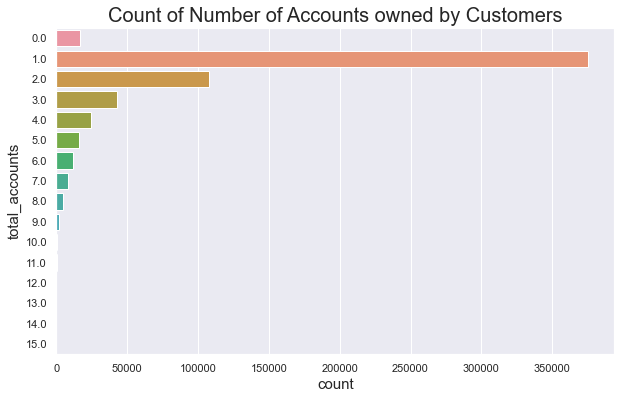

In [110]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'total_accounts', data = df);
plt.title("Count of Number of Accounts owned by Customers");

Majority of the customers only hold a single account. But there are considerable other customers holding multiple accounts.

In [111]:
df.duplicated().sum()

4868

Dropping remaining duplicated rows.

In [112]:
df = df.drop_duplicates().reset_index(drop = True)

In [113]:
df.duplicated().sum()

0

In [114]:
any(df.isna().sum())

False

#### Categorical Encoding

In order to reduce the number of categories, I will group them by similarity.

In [115]:
len(df['cust_residence'].unique())

113

In [116]:
df['cust_residence'].unique()

array(['ES', 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE', 'DO',
       'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO', 'HN',
       'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR', 'NI',
       'HK', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU', 'GT', 'GA', 'NO',
       'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'CZ', 'ET', 'CM', 'SA',
       'CI', 'QA', 'SG', 'BO', 'BZ', 'UY', 'MD', 'BA', 'CF', 'KR', 'LU',
       'NG', 'CD', 'ZA', 'AU', 'KZ', 'CU', 'DK', 'JP', 'SK', 'GM', 'AO',
       'HR', 'PK', 'PA', 'MK', 'LY', 'LT', 'TH', 'GQ', 'GN', 'TR', 'IS',
       'KE', 'VN', 'RS', 'AD', 'NZ', 'OM', 'EG', 'LV', 'ML', 'CG', 'GW',
       'HU', 'DZ', 'SL', 'GI', 'KH', 'MM', 'BY', 'PH', 'KW', 'GH', 'TN',
       'TG', 'LB', 'GE'], dtype=object)

There are 113 countries. I will combine some categories by continent. Only ES will be kept separate.

In [117]:
#importing country by continent data

url = "https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv"

country = pd.read_csv(url)
country

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [118]:
#There are some missing values. This is actually because pandas sees "NA" and 
#considers these as missing values.

country[country['Two_Letter_Country_Code'].isna()]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
152,Africa,AF,"Namibia, Republic of",NaN,NAM,516.0


In [119]:
country['Two_Letter_Country_Code'] = country['Two_Letter_Country_Code'].fillna("NA")

In [120]:
country['Two_Letter_Country_Code'].unique()

array(['AF', 'AL', 'AQ', 'DZ', 'AS', 'AD', 'AO', 'AG', 'AZ', 'AR', 'AU',
       'AT', 'BS', 'BH', 'BD', 'AM', 'BB', 'BE', 'BM', 'BT', 'BO', 'BA',
       'BW', 'BV', 'BR', 'BZ', 'IO', 'SB', 'VG', 'BN', 'BG', 'MM', 'BI',
       'BY', 'KH', 'CM', 'CA', 'CV', 'KY', 'CF', 'LK', 'TD', 'CL', 'CN',
       'TW', 'CX', 'CC', 'CO', 'KM', 'YT', 'CG', 'CD', 'CK', 'CR', 'HR',
       'CU', 'CY', 'CZ', 'BJ', 'DK', 'DM', 'DO', 'EC', 'SV', 'GQ', 'ET',
       'ER', 'EE', 'FO', 'FK', 'GS', 'FJ', 'FI', 'AX', 'FR', 'GF', 'PF',
       'TF', 'DJ', 'GA', 'GE', 'GM', 'PS', 'DE', 'GH', 'GI', 'KI', 'GR',
       'GL', 'GD', 'GP', 'GU', 'GT', 'GN', 'GY', 'HT', 'HM', 'VA', 'HN',
       'HK', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IL', 'IT', 'CI',
       'JM', 'JP', 'KZ', 'JO', 'KE', 'KP', 'KR', 'KW', 'KG', 'LA', 'LB',
       'LS', 'LV', 'LR', 'LY', 'LI', 'LT', 'LU', 'MO', 'MG', 'MW', 'MY',
       'MV', 'ML', 'MT', 'MQ', 'MR', 'MU', 'MX', 'MC', 'MN', 'MD', 'ME',
       'MS', 'MA', 'MZ', 'OM', 'NA', 'NR', 'NP', 'N

In [121]:
country['Continent_Code'].unique()

array(['AS', 'EU', 'AN', 'AF', 'OC', nan, 'SA'], dtype=object)

In [122]:
country[country['Continent_Code'].isna()]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
7,North America,NaN,Antigua and Barbuda,AG,ATG,28.0
13,North America,NaN,"Bahamas, Commonwealth of the",BS,BHS,44.0
18,North America,NaN,Barbados,BB,BRB,52.0
20,North America,NaN,Bermuda,BM,BMU,60.0
27,North America,NaN,Belize,BZ,BLZ,84.0
30,North America,NaN,British Virgin Islands,VG,VGB,92.0
38,North America,NaN,Canada,CA,CAN,124.0
40,North America,NaN,Cayman Islands,KY,CYM,136.0
55,North America,NaN,"Costa Rica, Republic of",CR,CRI,188.0
57,North America,NaN,"Cuba, Republic of",CU,CUB,192.0


All of these countries belong to the continent of North America

In [123]:
country['Continent_Code'] = country['Continent_Code'].fillna("NA")

In [124]:
country = country[['Continent_Code', 'Two_Letter_Country_Code']]
country

,Continent_Code,Two_Letter_Country_Code
0,AS,AF
1,EU,AL
2,AN,AQ
3,AF,DZ
4,OC,AS
...,...,...
257,AF,ZM
258,OC,XX
259,AS,XE
260,AS,XD


In [125]:
np.setdiff1d(df['cust_residence'].unique(), country['Two_Letter_Country_Code'].unique())

array([], dtype=object)

In [126]:
country.loc[country['Two_Letter_Country_Code'] == 'US', 'Continent_Code']

248    NA
Name: Continent_Code, dtype: object

In [127]:
%%time
for i in df['cust_residence'].unique():
    if i == "ES":
        pass
    else:
        df.loc[df['cust_residence'] == i, "cust_residence"] = \
        country.loc[country['Two_Letter_Country_Code'] == i, 'Continent_Code'].unique()[0]

Wall time: 6.09 s


In [128]:
df

,emp_index,cust_residence,cust_gender,age,new_cust_index,cust_seniority,indrel,cust_type,cust_rel_time,cust_res_index,is_foreign,channel_to_join,deceased_index,name_province,activity_index,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,long_term_deposit,ind_dela_fin_ult1,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,boxcox_household_income,total_accounts
0,N,ES,H,35,0.0,6,1.0,1.0,A,1,0,KHL,0,MALAGA,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2015,1,0,4.885048,1.0
1,N,ES,V,23,0.0,35,1.0,1.0,I,1,1,KHE,0,CIUDAD REAL,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,4.755950,1.0
2,N,ES,V,23,0.0,35,1.0,1.0,I,1,0,KHE,0,CIUDAD REAL,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,4.928461,1.0
3,N,ES,H,22,0.0,35,1.0,1.0,I,1,0,KHD,0,ZARAGOZA,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,4.925974,1.0
4,N,ES,V,23,0.0,35,1.0,1.0,A,1,0,KHE,0,ZARAGOZA,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,4.903875,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605809,N,ES,H,27,0.0,22,1.0,1.0,A,1,0,KFC,0,MADRID,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2013,9,2,4.822642,1.0
605810,N,ES,H,56,0.0,22,1.0,1.0,A,1,0,KFC,0,"CORUÑA, A",1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,9,2,4.865936,1.0
605811,N,ES,V,39,0.0,22,1.0,1.0,A,1,0,KFC,0,"CORUÑA, A",1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2013,9,2,4.874562,2.0
605812,N,ES,V,36,0.0,22,1.0,1.0,A,1,1,KFC,0,MADRID,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2013,9,2,4.828461,2.0


In [129]:
df['cust_residence'].unique()

array(['ES', 'NA', 'EU', 'AS', 'AF', 'SA', 'OC'], dtype=object)

In [130]:
df['cust_residence'].value_counts()

ES    602143
EU      1761
AS      1184
NA       483
SA       113
AF       103
OC        27
Name: cust_residence, dtype: int64

From 103 categories, we have grouped countries (except ES) by continent.

Similarly, I will do the same for `name_province` variable by grouping it by autonomous regions.

In [131]:
len(df['name_province'].unique())

53

In [132]:
new_df = pd.read_html("https://o.nsd.no/european_election_database/country/spain/administrative_divisions.html")

In [133]:
new_df = new_df[1].iloc[:,2:]

In [134]:
new_df

,NUTS 1,NUTS 2,NUTS 3
0,NaN,NaN,NaN
1,Noroeste,NaN,NaN
2,NaN,Galicia,NaN
3,NaN,NaN,A Coruña
4,NaN,NaN,Lugo
...,...,...,...
74,NaN,NaN,Melilla
75,Canarias,NaN,NaN
76,NaN,Canarias,NaN
77,NaN,NaN,Las Palmas


In [135]:
new_df['NUTS 1'] = new_df['NUTS 1'].shift(-1)
new_df['NUTS 2'] = new_df['NUTS 2'].shift(-2)
new_df['NUTS 3'] = new_df['NUTS 3'].shift(-3)

In [136]:
new_df = new_df.iloc[:,1:]
new_df

,NUTS 2,NUTS 3
0,Galicia,A Coruña
1,NaN,Lugo
2,NaN,Ourense
3,NaN,Pontevedra
4,NaN,NaN
...,...,...
74,Canarias,Las Palmas
75,NaN,Santa Cruz de Tenerife
76,NaN,NaN
77,NaN,NaN


In [137]:
to_drop = new_df[new_df['NUTS 3'].isna()].index
new_df = new_df.drop(index = to_drop, axis = 0).reset_index(drop = True)

In [138]:
new_df['NUTS 2'] = new_df['NUTS 2'].fillna(method = "ffill")

In [139]:
#replacing certain letters and words
word_dict = {
    "A CORUÑA" : "CORUÑA, A", 
    "CASTELLÓN / CASTELLÓ" : "CASTELLON",
    "Á" : "A",
    "GUIPÚZCOA" : "GIPUZKOA", 
    "ALICANTE / ALACANT" : "ALICANTE", 
    "Í" : "I",
    "Ó" : "O", 
    "É" : "E", 
    "VALENCIA / VALÈNCIA" : "VALENCIA", 
    "LA RIOJA" : "RIOJA, LA", 
    "LLEIDA" : "LERIDA", 
    "LAS PALMAS" : "PALMAS, LAS",  
    "ILLES BALEARS" : "BALEARS, ILLES", 
    "VIZCAYA" : "BIZKAIA"
}

new_df['NUTS 3'] = new_df['NUTS 3'].str.upper().replace(
    word_dict.keys(),
    word_dict.values(),
    regex = True
)

np.setdiff1d(new_df['NUTS 3'].unique(), df['name_province'].unique()) 

array([], dtype=object)

In [140]:
np.setdiff1d(df['name_province'].unique(), new_df['NUTS 3'].unique())

array(['Foreign'], dtype=object)

In [141]:
%%time
for i in df['name_province'].unique():
    if i == "Foreign":
        pass
    else:
        df.loc[df['name_province'] == i, "name_province"] = \
        new_df.loc[new_df['NUTS 3'] == i, 'NUTS 2'].unique()[0]

Wall time: 2.52 s


In [142]:
df['name_province'].unique()

array(['Andalucía', 'Castilla-La Mancha', 'Aragón', 'Castilla y León',
       'País Vasco', 'Extremadura', 'Cataluña',
       'Comunidad Foral de Navarra', 'Galicia', 'Comunidad de Madrid',
       'Comunidad Valenciana', 'Cantabria', 'Illes Balears', 'La Rioja',
       'Región de Murcia', 'Canarias', 'Principado de Asturias',
       'Ciudad Autónoma de Melilla', 'Foreign',
       'Ciudad Autónoma de Ceuta'], dtype=object)

In [143]:
len(df['name_province'].unique())

20

We have grouped categories in a way that helped reduce from 53 to 20 groups.

In [144]:
#Checking for value counts for categorical variables

for col in df.select_dtypes(include = "object").columns:
    print(df[col].value_counts())
    print()

N    605334
B       194
A       144
F       141
S         1
Name: emp_index, dtype: int64

ES    602143
EU      1761
AS      1184
NA       483
SA       113
AF       103
OC        27
Name: cust_residence, dtype: int64

V    334705
H    271109
Name: cust_gender, dtype: int64

A    321517
I    284297
Name: cust_rel_time, dtype: int64

KHE    200191
KAT    165124
KFC    146891
KFA     20802
KHD      5759
        ...  
KDI         1
KGC         1
KCT         1
KGU         1
KDB         1
Name: channel_to_join, Length: 156, dtype: int64

Comunidad de Madrid           200566
Andalucía                      84876
Cataluña                       63336
Comunidad Valenciana           46285
Galicia                        38950
Castilla y León                35558
Castilla-La Mancha             24046
Aragón                         18373
Región de Murcia               16819
Extremadura                    14885
Canarias                       13385
País Vasco                     13255
Principado de Astu

In [145]:
#grouping regions starting with "ciudad" as they are lower in occurance compared to other regions.

df.loc[df['name_province'].str.startswith("Ciudad"), "name_province"] = "Ciudad Autónoma"

In [146]:
df['name_province'].value_counts()

Comunidad de Madrid           200566
Andalucía                      84876
Cataluña                       63336
Comunidad Valenciana           46285
Galicia                        38950
Castilla y León                35558
Castilla-La Mancha             24046
Aragón                         18373
Región de Murcia               16819
Extremadura                    14885
Canarias                       13385
País Vasco                     13255
Principado de Asturias         11797
Cantabria                       6823
Illes Balears                   4921
La Rioja                        3800
Comunidad Foral de Navarra      3725
Foreign                         3665
Ciudad Autónoma                  749
Name: name_province, dtype: int64

In [151]:
df_no_encoding = df.copy()

In [153]:
#Encoding

from sklearn.pipeline import make_pipeline
from feature_engine.encoding import OneHotEncoder, CountFrequencyEncoder

encoder = make_pipeline(
    (OneHotEncoder(top_categories = 4, variables = ["emp_index"])),
    (OneHotEncoder(top_categories = 6, variables = ["cust_residence"])), 
    (OneHotEncoder(variables = ["cust_gender", "cust_rel_time"])), 
    (CountFrequencyEncoder(encoding_method='frequency', variables=['name_province', 'channel_to_join']))
)
encoder

Pipeline(steps=[('onehotencoder-1',
                 OneHotEncoder(top_categories=4, variables=['emp_index'])),
                ('onehotencoder-2',
                 OneHotEncoder(top_categories=6, variables=['cust_residence'])),
                ('onehotencoder-3',
                 OneHotEncoder(variables=['cust_gender', 'cust_rel_time'])),
                ('countfrequencyencoder',
                 CountFrequencyEncoder(encoding_method='frequency',
                                       variables=['name_province',
                                                  'channel_to_join']))])

In [154]:
%%time
df_encoded = encoder.fit_transform(df)

df_encoded

Wall time: 2.63 s


,age,new_cust_index,cust_seniority,indrel,cust_type,cust_res_index,is_foreign,channel_to_join,deceased_index,name_province,activity_index,saving_acc,guarantees,current_acc,derivada_acc,payroll_acc,junior_acc,mass_particular_acc,particular_acc,particular_plus_acc,short_term_deposit,long_term_deposit,ind_dela_fin_ult1,e_account,funds,mortgage,pensions1,loans,taxes,credit_card,securities,home_account,payroll,pensions2,direct_debit,first_holder_date_year,first_holder_date_month,first_holder_date_day,boxcox_household_income,total_accounts,emp_index_N,emp_index_B,emp_index_A,emp_index_F,cust_residence_ES,cust_residence_EU,cust_residence_AS,cust_residence_NA,cust_residence_SA,cust_residence_AF,cust_gender_H,cust_gender_V,cust_rel_time_A,cust_rel_time_I
0,35,0.0,6,1.0,1.0,1,0,0.001184,0,0.140102,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2015,1,0,4.885048,1.0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
1,23,0.0,35,1.0,1.0,1,1,0.330450,0,0.039692,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,4.755950,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
2,23,0.0,35,1.0,1.0,1,0,0.330450,0,0.039692,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,4.928461,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
3,22,0.0,35,1.0,1.0,1,0,0.009506,0,0.030328,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,4.925974,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
4,23,0.0,35,1.0,1.0,1,0,0.330450,0,0.030328,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2012,8,4,4.903875,1.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605809,27,0.0,22,1.0,1.0,1,0,0.242469,0,0.331069,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2013,9,2,4.822642,1.0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
605810,56,0.0,22,1.0,1.0,1,0,0.242469,0,0.064294,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2013,9,2,4.865936,1.0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
605811,39,0.0,22,1.0,1.0,1,0,0.242469,0,0.064294,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2013,9,2,4.874562,2.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
605812,36,0.0,22,1.0,1.0,1,1,0.242469,0,0.331069,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2013,9,2,4.828461,2.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0


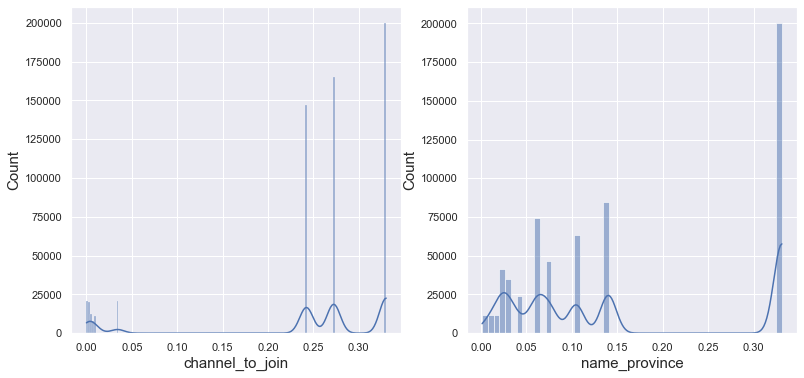

In [164]:
fig, ax = plt.subplots(1,2, figsize = (13,6))

sns.histplot(df_encoded['channel_to_join'], kde = True, ax = ax[0]);
sns.histplot(df_encoded['name_province'], kde = True, ax = ax[1]);

In [165]:
df_encoded.columns

Index(['age', 'new_cust_index', 'cust_seniority', 'indrel', 'cust_type',
       'cust_res_index', 'is_foreign', 'channel_to_join', 'deceased_index',
       'name_province', 'activity_index', 'saving_acc', 'guarantees',
       'current_acc', 'derivada_acc', 'payroll_acc', 'junior_acc',
       'mass_particular_acc', 'particular_acc', 'particular_plus_acc',
       'short_term_deposit', 'long_term_deposit', 'ind_dela_fin_ult1',
       'e_account', 'funds', 'mortgage', 'pensions1', 'loans', 'taxes',
       'credit_card', 'securities', 'home_account', 'payroll', 'pensions2',
       'direct_debit', 'first_holder_date_year', 'first_holder_date_month',
       'first_holder_date_day', 'boxcox_household_income', 'total_accounts',
       'emp_index_N', 'emp_index_B', 'emp_index_A', 'emp_index_F',
       'cust_residence_ES', 'cust_residence_EU', 'cust_residence_AS',
       'cust_residence_NA', 'cust_residence_SA', 'cust_residence_AF',
       'cust_gender_H', 'cust_gender_V', 'cust_rel_time_A', 'cus

In [180]:
df_no_encoding.shape

(605814, 44)

In [166]:
df_encoded.shape

(605814, 54)

In [167]:
605814/1000000 * 100

60.581399999999995

In [181]:
1000000 - 605814

394186

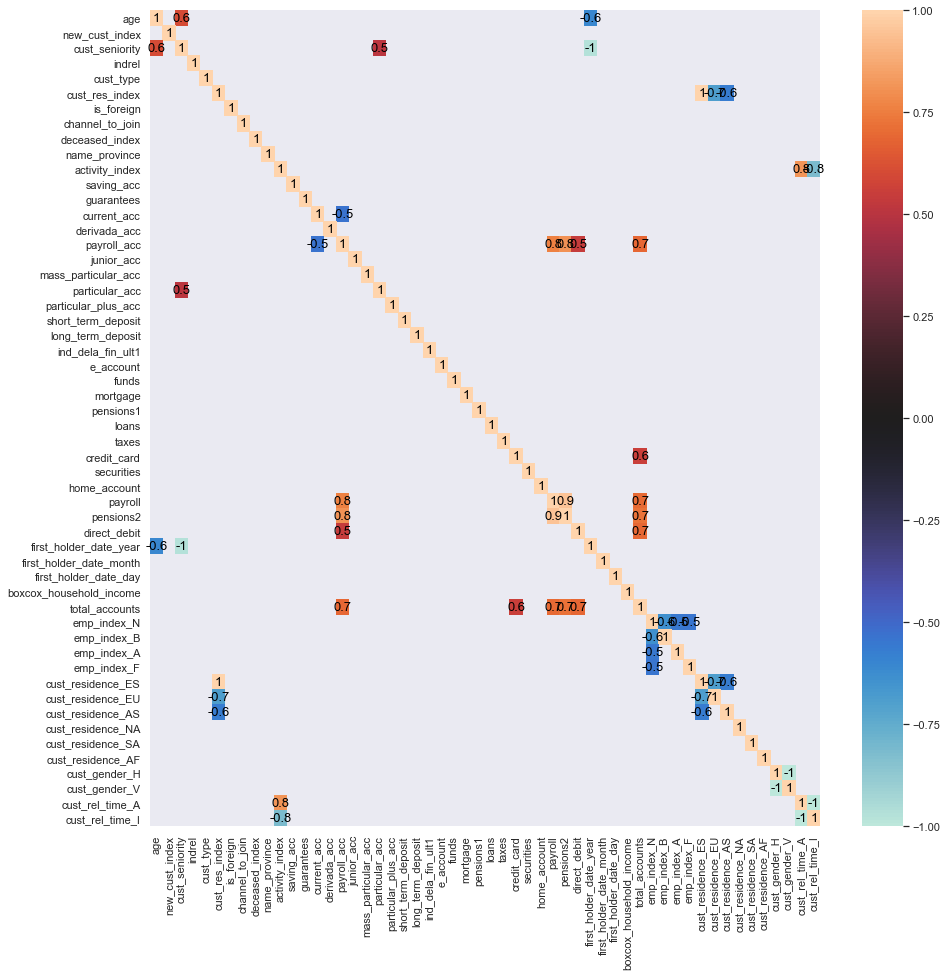

In [173]:
corr = df_encoded.corr()
select_corr = corr[abs(corr) > 0.5]

plt.figure(figsize = (15,15))
sns.heatmap(select_corr, annot = True, center = 0, fmt = ".1g", annot_kws={"fontsize":13, 
                                                                           "color" : "black"});

All missing values, duplicated values and outliers has been taken care of. From 1 million observations, almost 400K have been dropped. Through the techniques Joseph has employed, around 60% of data has been maintained.

In [ ]:
# df_encoded.to_csv("df_encoded.csv", index = False)
# df_no_encoding.to_csv("df_no_encoding.csv", index = False)